# Solución a Ejercicios Teóricos   

<img src="img/E1.2.png">

## Solución
**(a)** Publicidad, promoción, descuento, cupon, oferta, desnudos, placer, producto, ganador, rifa, membresia, suscripcion, gratis.
<br><br>
**(b)** Informe, importante, atento, leer, tarea, urgente, reunión, entrega, extracto.
<br><br>
**(c)** El parametro que afecta directamente como son clasificadas las palabras entre spam o no spam es la "tolerancia" que se ingresa al perceptron, es decir nuestro valor $b$.

<img src="img/E1.3.png">

### Solución
**(a)** Supongamos que el ejemplo $\textbf{x}$ esta mal clasificado por $\textbf{w}^T$ en la iteración $t$ del algoritmo, es decir, $sign(\textbf{w}^T(t)\textbf{x}(t))\neq y(t)$, esto inmediatamente implica que $y(t)\textbf{w}^T(t)\textbf{x}(t)<0$.
<br><br>
**(b)** Note que para la iteración $t+1$ se tiene que 
<br><br>
$$y(t)\textbf{w}^T(t+1)\textbf{x}(t)=y(t)(\textbf{w}^T(t)+y(t)\textbf{x}^T(t))\textbf{x}(t)=y(t)\textbf{w}^T(t)\textbf{x}(t)+y^2(t)\textbf{x}^T(t)\textbf{x}(t)=y(t)\textbf{w}^T(t)\textbf{x}(t)+y^2(t)||\textbf{x}(t)||^2$$
<br>
Como la cantidad $||\textbf{x}(t)||^2\neq 0$ o si no el vector $\textbf{x}$ seria $\textbf{0}$ (No hay datos con los que trabajar), entonces la cantidad $y^2(t)||\textbf{x}||^2>0$.
<br>
Así: $$y(t)\textbf{w}^T(t+1)\textbf{x}(t)=y(t)\textbf{w}^T(t)\textbf{x}(t)+y^2(t)||\textbf{x}(t)||^2>y(t)\textbf{w}^T(t)\textbf{x}(t)$$
Que era lo que se queria probar.
<br><br>
**(c)** Por **(b)** vemos que la cantidad $y(t)\textbf{w}^T(t)\textbf{x}(t)$ a medida que se itera tiende a hacerse una cantidad positiva (Note que tiene que pasar a ser positiva pues siempre se le está sumando la cantidad $y^2(t)||\textbf{x}(t)||^2>0$ que no depende de $\textbf{w}(t)$, por tanto 0 no puede ser una asíntota). Esto significa que en un numero finito de iteraciones ($t<j<\infty$) se tendrá que $y(j)\textbf{w}^T(j)\textbf{x}(j)>0$, es decir, $\textbf{x}$ pasa a estar bien clasificado por $\textbf{w}(j)$.

<img src="img/E1.10.png">

### Solución
Creando la simulación de lanzar 1000 monedas cada una 10 veces.

In [42]:
#1 significa cara, 0 significa sello
import numpy as np
from numpy import prod
import random

#Tomando 1000 monedas
resultToss = []
for j in range(1000):
    nTrials=10
    #Simulacion de tirar cada moneda 10 veces (sin sesgo) con una distribucion binomial.
    tossSample = np.random.binomial(1,0.5,nTrials)
    resultToss.append(tossSample)

**(a)** Note que el $\mu$ para cada uno de los $c_1$, $c_{rand}$ y $c_{min}$ debe ser de $0.5$ teoricamente, pues la moneda es no sesgada.

**(b)** Repitiendo el experimiento 100000 veces.

In [43]:
#Se crean listas para almacenar cada una de las monedas escogidas en cada repetición del experimento
c1_list=[]
crand_list=[]
cmin_list=[]
#Se repite el experimento 100000 veces
for i in range(100000):
    resultToss = []
    for j in range(1000):
        nTrials=10
        tossSample = np.random.binomial(1,0.5,nTrials)
        resultToss.append(tossSample)
    #Tomando cada una de las monedas y almacenando los datos
    c1=resultToss[0]
    crand=resultToss[random.randint(0, 999)]
    cmin=resultToss[0]
    for coin in resultToss:
        if np.sum(coin)<=np.sum(cmin):
            cmin=coin
            
    c1_list.append(c1)
    crand_list.append(crand)
    cmin_list.append(cmin)

Calculo de las frecuencias de cara para cada una de las monedas escogidas en los 100000 experimentos.

In [44]:
#Listas para almacenar la frecuencia de caras
c1_frq=[]
crand_frq=[]
cmin_frq=[]
#Se itera por cada moneda para hayar la frecuencia de caras obtenidas
for c1, crand, cmin in zip(c1_list, crand_list, cmin_list):
    c1_frq.append(np.sum(c1)/10)
    crand_frq.append(np.sum(crand)/10)
    cmin_frq.append(np.sum(cmin)/10)

Función para plotear histogramas resaltando sus compartimientos por colores.

In [45]:
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

def histogram(x,n_bins):
    fig, axs = plt.subplots(1, 2, tight_layout=True)
    
    # N is the count in each bin, bins is the lower-limit of the bin
    N, bins, patches = axs[0].hist(x, bins=n_bins, align='right', ec='black')
    axs[0].set_ylabel('Number of ocurrences')
    axs[0].set_xlabel('Fraction of heads')
    
    # We'll color code by height, but you could use any scalar
    fracs = N / N.max()
    
    # we need to normalize the data to 0..1 for the full range of the colormap
    norm = colors.Normalize(fracs.min(), fracs.max())
    
    # Now, we'll loop through our objects and set the color of each accordingly
    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)
    
    # We can also normalize our inputs by the total number of counts
    N, bins, patches = axs[1].hist(x, bins=n_bins, density=True, align='right',ec='black')
    axs[1].set_ylabel('Percentage of ocurrences')
    axs[1].set_xlabel('Fraction of heads')
    
    # Now we format the y-axis to display percentage
    axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=10))
    
    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)

Histograma de la proporcion de caras tomando como ejemplo la primera moneda, es decir, $v_1$.

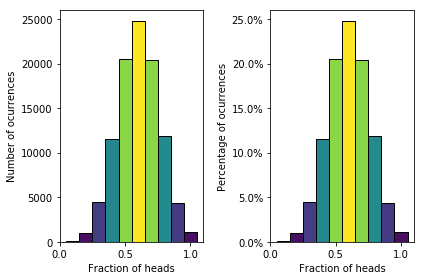

In [46]:
bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
histogram(c1_frq,bins)

Histograma de la proporcion de caras tomando como ejemplo una moneda aleatoria, es decir, $v_{rand}$.

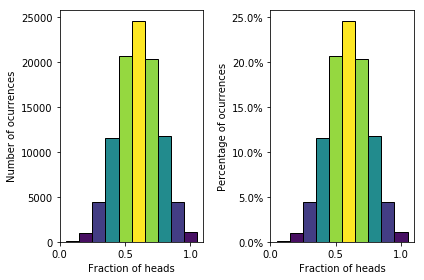

In [47]:
histogram(crand_frq,bins)

Histograma de la proporcion de caras tomando como moneda la moneda con el menor numero de caras, es decir, $v_{min}$.

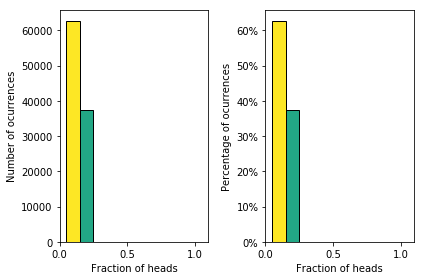

In [48]:
histogram(cmin_frq,bins)

**(c)** Graficando los resultados con la cota de Hoeffding.

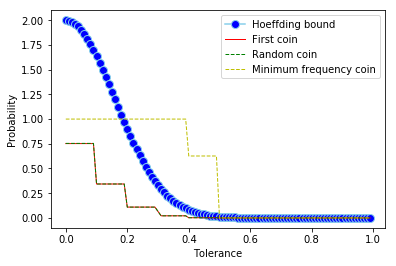

In [56]:
#Creando lista con valores para epsilon
eps = np.arange(0.0, 1.0, 0.01)
#Funcion que calcula los valores de la cota de Hoeffding
def hoeffding(eps, N):
    return 2*np.exp(-2*(eps**2)*N)
#Calculando las cotas de Hoeffding para los diferentes valores de epsilon
bounds_list= hoeffding(eps, 10)

#Calculando las diferencias entres los v_i y el mu teorico
c1_diff=np.abs(np.array(c1_frq)-0.5)
crand_diff=np.abs(np.array(crand_frq)-0.5)
cmin_diff=np.abs(np.array(cmin_frq)-0.5)
#Creando listas para almacenar las probabilidades
p1, prand, pmin = np.zeros(len(eps)),np.zeros(len(eps)),np.zeros(len(eps))
#Calculando las probabilidades
for i in range(len(eps)):
    p1[i]=np.sum(c1_diff>eps[i])/100000
    prand[i]=np.sum(crand_diff>eps[i])/100000
    pmin[i]=np.sum(cmin_diff>eps[i])/100000

#Graficando los resultados
plt.plot(eps, bounds_list, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', label='Hoeffding bound')
plt.plot(eps, p1, marker='', color='r', linewidth=1, label='First coin')
plt.plot(eps, prand, marker='', color='g', linewidth=1, linestyle='dashed', label='Random coin')
plt.plot(eps, pmin, marker='', color='y', linewidth=1, linestyle='dashed', label='Minimum frequency coin')
plt.ylabel('Probability')
plt.xlabel('Tolerance')
plt.legend()

**(d)** Según **(c)** vemos que la escogencia de la moneda como la primera ($c_1$) y de manera aleatoria ($c_{rand}$) cumplen la cota de Hoeffding, mientras que la moneda de mínima frecuencia ($c_{min}$) no obedece la cota.  Esto se da debido a que la cota de Hoeffding se cumple siempre y cuando la hipótesis esta fija **antes** de generar el conjunto de datos con el que se va a trabajar, en nuestro caso las monedas $c_1$ y $c_{rand}$ se escogieron sin conocer los datos de entrenamiento, mientras que para la escogencia de la moneda $c_{min}$ se tuvieron que primero conocer los datos y hacer algunos cálculos con ellos, por tanto, para $c_{min}$ no se cumplen las condiciones de la prueba de la cota de Hoeffding.

**(e)** La relación entre los resultados en **(d)** y la figura 1.10 se da de la siguiente manera; los contenedores en la figura simulan nuestras muestras para las monedas $c_1$, $c_{rand}$ y $c_{min}$. Por **(d)** sabemos que las hipótesis para $c_1$ y $c_{rand}$ estuvieron fijas siempre y por tanto la hipótesis final $g$ fue la misma, es decir, $E_{in}$ era una buena aproximación para $E_{out}$ bajo la cota de Hoeffding. Por otro lado, para $c_{min}$ esto no sucedió pues la hipótesis final $g$ cambio dependiendo de los datos de entrenamiento y así $E_{in}$ se vería sesgado y la cota de Hoeffding no aproximaría bien a $E_{out}$.

<img src="img/E1.11.png">

### Solución
**(a)** $S$ no necesariamente produce una hipótesis que garantiza un mejor desempeño que una función aleatoria en cualquier punto fuera de $D$. Considere la siguiente situación: suponga que todos los elementos de $D$ están clasificados como $+1$, esto implica que $S$ tomara como hipótesis a $h_1$, por otro lado, suponga que todos los elementos de $X$ fuera de $D$ están clasificados como $-1$ por $f$. Entonces, $h_1$ fallara en todos los elementos fuera de $D$, mientras que una función aleatoria de clasificación (llamémosla $z$) probablemente clasificara bien el $50\%$ de los elementos de $X$. Así, $z$ tendrá un mejor desempeño que $h_1$. Es decir, $S$ no necesariamente produce una mejor hipótesis que una función aleatoria.

**(b)** Sí es posible, considere la misma situación expuesta en **(a)** en donde los 25 ejemplos de entrenamiento están clasificados como $+1$ y, sin embargo, todos los demás elementos del espacio de entrada estén clasificados como $-1$ por $f$. En este caso el algoritmo $S$ tomara como hipótesis la función $h_1$, fuera de $D$ la hipótesis $h_1$ fallara en todos los demás elementos del espacio de entrada, por otro lado, el algoritmo $C$ toma a $h_2$ como hipótesis y fuera de $D$ clasificara todos los demás elementos del espacio de entrada correctamente, por tanto, en este caso $h_2$ tiene un mejor desempeño. Es decir $C$ produce una mejor hipótesis que $S$.

**(c)** Estamos asumiendo que $p=0.9$, esto implica que $h_1$ probablemente clasificará bien el $90\%$ de los elementos de $X$, mientras que $h_2$ probablemente clasificará bien solo el $10\%$ de los elementos de $X$, por tanto, $h_1$ tendrá muy probablemente un mejor desempeño que $h_2$. Por otro lado, estamos asumiendo que todos los ejemplos en $D$ cumplen $y_n=+1$ entonces la probabilidad de que el algoritmo $S$ tome como hipótesis a $h_1$ es de $1$, y por el análisis anterior sabemos que $h_1$ es la mejor hipótesis bajo estas condiciones. Por tanto, la probabilidad de que $S$ produzca una mejor hipótesis que $C$ es de $1$.

**(d)** Bajo el mismo razonamiento de **(c)** sabemos que $S$ siempre tomara como hipótesis a $h_1$ y $C$ siempre tomara a $h_2$. De esta manera vemos que si $p<0.5$, entonces $h_2$ probablemente tenga un mejor desempeño que $h_1$ fuera de $D$, y por tanto $C$ probablemente produzca una mejor hipótesis que $S$.

<img src="img/E1.12.png">

### Solución.
La mejor respuesta que se puede dar es **(c)**. Si la función objetivo $f$ es muy compleja de aprender nuestro espacio de hipótesis $H$ debe ser muy grande y por la desigualdad de Hoeffding el chance de obtener una $g$ que aproxime bien a $f$ es baja, por tanto, podemos fallar en nuestra tarea. Por otro lado, si la $f$ no es muy compleja, y el tamaño de $H$ es relativamente pequeño respecto a nuestros 4000 puntos de datos, entonces por la desigualdad de Hoeffding produciremos una buena $g$ que aproxime bien a $f$.